In [93]:
import numpy as np
from math import exp, pow
from numpy.linalg import inv
from functools import reduce
import matplotlib.pyplot as plt

## Interpolation with RBF

In [3]:
inp = np.array([2, 3, 4])
out = np.array([3, 6, 5])
center = np.array([2, 4])

$$
f( x) =\sum ^{P}_{p=1} a_{p} .R_{p} +b
$$

$$
R_{p} = e^{-\frac{1}{2\sigma ^{2}} .\parallel ( X_{i}) -( X_{p}) \parallel ^{2}}
$$

$$
\sigma =\frac{P_{max} -P_{min}}{\sqrt{2P}}
$$

$$
\sigma =\frac{4-2}{\sqrt{2.2}} \ 
$$

$$
\sigma ^{2} =1
$$

$$
C_{1}=2
$$

$$
C_{2}=4
$$

In [14]:
def gaussian (x, c):
    return exp(-0.5 * pow((x - c), 2))

In [42]:
R = np.ones((len(inp), (len(center) + 1)))

for i, iv in enumerate(inp):
    for j, jv in enumerate(center):
        R[i, j] =(gaussian(inp[i], center[j]))

In [44]:
R

array([[1.        , 0.13533528, 1.        ],
       [0.60653066, 0.60653066, 1.        ],
       [0.13533528, 1.        , 1.        ]])

$$\displaystyle \frac{1}{[ R]} =\left([ R]^{t} .[ R]\right)^{-1} .[ R]^{t}$$

In [49]:
Rt = R.transpose()

In [53]:
RtR = Rt.dot(R)

In [56]:
iRtR = inv(RtR)

In [62]:
oneR = iRtR.dot(Rt)

$$
\displaystyle \begin{bmatrix}
a
\end{bmatrix} =\frac{1}{[ R]} \ \begin{bmatrix}
A
\end{bmatrix}
$$

In [64]:
a = oneR.dot(out)

In [88]:
def RBF(x):
    y = a * [gaussian(x, 2), gaussian(x, 4), 1]
    return reduce((lambda x, y: x + y), y)

In [105]:
input_test = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
output_test = list(map(RBF, input_test))
output_test

[-10.00965072898239,
 -2.3451368248388675,
 3.0000000000004583,
 5.202720311121578,
 5.999999999999879,
 6.493034173618817,
 4.999999999999666,
 -0.40551802762518463,
 -8.632419412309869]

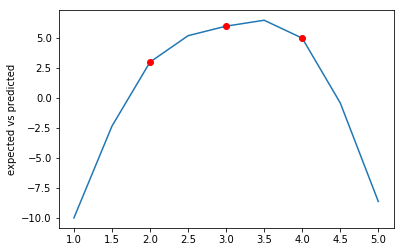

In [106]:
plt.plot(input_test, output_test)
plt.plot([2,3,4], [3,6,5], 'ro')
plt.yscale('linear')
plt.xscale('linear')
plt.ylabel('expected vs predicted')
plt.show()